In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [4]:
#read data
orders = pd.read_excel('data/muesli_raw_data.xlsx', header=1) #Sonia needs to change the path
#df = pd.read_csv('data/muesli_csv.csv', header=1)
#df = pd.read_csv('/Users/linaperez/downloads/5 - Muesli Project raw data - Orders.csv', header=1) #Sonia needs to change the path
orders.head()


,Index,Order ID,Order Date,Ship mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27.0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,45.0,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714
2,48.0,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3.0,0.0,4.9500
3,60.0,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2.0,0.0,3.3000
4,63.0,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2.0,0.0,6.1512


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Index           9994 non-null   float64       
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Customer Name   9994 non-null   object        
 6   Origin Channel  9994 non-null   object        
 7   Country/Region  9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Postal Code     9983 non-null   float64       
 11  Region          9994 non-null   object        
 12  Category        9994 non-null   object        
 13  Sub-Category    9994 non-null   object        
 14  Product ID      9994 non-null   object        
 15  Sale

In [6]:
arrival= pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Campaign Data')
arrival.head()

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


In [7]:
truck = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Order Process Data')
truck.head()

,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604.0,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605.0,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [8]:
ready_pickup = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='InternData Study')
ready_pickup.head()

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [51]:
#joining tables
df1= pd.merge(orders, arrival, on= "Order ID", how= "inner")
#df2= pd.merge(truck, ready_pickup, on= "Order ID", how= "outer")
#df3 = pd.merge(df2, ready_pickup, on= "Order ID", how="left")
#df3.info()
#df1 = pd.concat([orders, arrival], axis=0)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Index              668 non-null    float64       
 1   Order ID           668 non-null    object        
 2   Order Date         668 non-null    datetime64[ns]
 3   Ship mode          668 non-null    object        
 4   Customer ID        668 non-null    object        
 5   Customer Name_x    668 non-null    object        
 6   Origin Channel     668 non-null    object        
 7   Country/Region     668 non-null    object        
 8   City               668 non-null    object        
 9   State              668 non-null    object        
 10  Postal Code        668 non-null    float64       
 11  Region             668 non-null    object        
 12  Category           668 non-null    object        
 13  Sub-Category       668 non-null    object        
 14  Product ID

In [57]:
df1.head()


,order_id,order_date,arrival_scan_date
0,CA-2019-145625,2019-09-11,2019-09-23
1,CA-2019-145625,2019-09-11,2019-09-23
2,CA-2019-162138,2019-04-23,2019-05-06
3,CA-2019-162138,2019-04-23,2019-05-06
4,CA-2019-169166,2019-05-09,2019-05-20


In [52]:
#clean df1
df1.columns = df1.columns.str.lower()
df1.columns = df1.columns.str.replace(" ","_")

In [68]:
#fd1 has order dates and arrivals for the gerneral lead time kpi
df1 = df1[["order_id", "order_date", "arrival_scan_date"]]
#create columns for order dates
df1["order_year"]=df1["order_date"].dt.year
df1["order_month"]=df1["order_date"].dt.month
df1["order_weekday"]=df1["order_date"].dt.dayofweek
#create columns for arrival
df1["arrival_year"]=df1["arrival_scan_date"].dt.year
df1["arrival_month"]=df1["arrival_scan_date"].dt.month
df1["arrival_weekday"]=df1["arrival_scan_date"].dt.dayofweek
#create columns for day difference
df1["day_dif_order"]= (df1["arrival_scan_date"]-df1["order_date"]).dt.days

In [69]:
df1.head()

,order_id,order_date,arrival_scan_date,order_year,order_month,order_weekday,arrival_year,arrival_month,arrival_weekday,day_dif_order
0,CA-2019-145625,2019-09-11,2019-09-23,2019,9,2,2019,9,0,12
1,CA-2019-145625,2019-09-11,2019-09-23,2019,9,2,2019,9,0,12
2,CA-2019-162138,2019-04-23,2019-05-06,2019,4,1,2019,5,0,13
3,CA-2019-162138,2019-04-23,2019-05-06,2019,4,1,2019,5,0,13
4,CA-2019-169166,2019-05-09,2019-05-20,2019,5,3,2019,5,0,11


In [79]:
leadtime= df1.groupby("day_dif_order").order_id.count()

<AxesSubplot:>

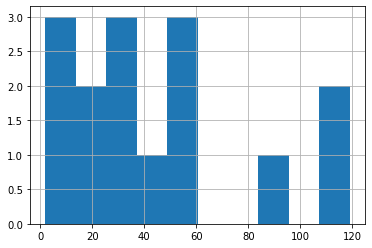

In [82]:
leadtime.hist()

In [17]:
#rename columns
df3.columns = df3.columns.str.lower()
df3.columns = df3.columns.str.replace(" ","_")
df3.head()

,index,order_id,order_date_x,ship_mode,customer_id,customer_name_x,origin_channel,country/region,city,state,...,discount,profit,arrival_scan_date,customer_name_y,row_id,order_date_y,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date
0,252.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,0.0,636.0003,2019-09-23,Kelly Collister,251.0,2019-09-11,2019-09-18,Standard Processing,2019-09-17,2019-09-18
1,252.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,0.0,636.0003,2019-09-23,Kelly Collister,251.0,2019-09-11,2019-09-18,Standard Processing,2019-09-17,2019-09-18
2,252.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,0.0,636.0003,2019-09-23,Kelly Collister,252.0,2019-09-11,2019-09-18,Standard Processing,2019-09-17,2019-09-18
3,252.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,0.0,636.0003,2019-09-23,Kelly Collister,252.0,2019-09-11,2019-09-18,Standard Processing,2019-09-17,2019-09-18
4,251.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,0.0,3.5767,2019-09-23,Kelly Collister,251.0,2019-09-11,2019-09-18,Standard Processing,2019-09-17,2019-09-18


In [20]:
combine = df3[[
 'order_id',
 'order_date_x',
 'customer_id',
 'category',
 'sub-category',
 'product_id',
 'arrival_scan_date',
 'row_id',
 'on_truck_scan_date',
 'ship_mode',
 'ready_to_ship_date',
 'pickup_date']]
combine


,order_id,order_date_x,customer_id,category,sub-category,product_id,arrival_scan_date,row_id,on_truck_scan_date,ship_mode,ship_mode,ready_to_ship_date,pickup_date
0,CA-2019-145625,2019-09-11,KC-16540,Special Projects Muesil,Gluten Free,TEC-AC-10003832,2019-09-23,251.0,2019-09-18,Standard Class,Standard Processing,2019-09-17,2019-09-18
1,CA-2019-145625,2019-09-11,KC-16540,Special Projects Muesil,Gluten Free,TEC-AC-10003832,2019-09-23,251.0,2019-09-18,Standard Class,Standard Processing,2019-09-17,2019-09-18
2,CA-2019-145625,2019-09-11,KC-16540,Special Projects Muesil,Gluten Free,TEC-AC-10003832,2019-09-23,252.0,2019-09-18,Standard Class,Standard Processing,2019-09-17,2019-09-18
3,CA-2019-145625,2019-09-11,KC-16540,Special Projects Muesil,Gluten Free,TEC-AC-10003832,2019-09-23,252.0,2019-09-18,Standard Class,Standard Processing,2019-09-17,2019-09-18
4,CA-2019-145625,2019-09-11,KC-16540,Power Muesli,Nuts and more,OFF-PA-10004569,2019-09-23,251.0,2019-09-18,Standard Class,Standard Processing,2019-09-17,2019-09-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,CA-2019-110023,2019-09-09,TS-21610,Power Muesli,Super Fibre Boost,OFF-BI-10001036,2019-09-16,992.0,2019-09-11,First Class,Express,2019-09-11,2019-09-11
246,CA-2019-163202,2019-09-27,BM-11650,Power Muesli,Super Fibre Boost,OFF-BI-10002764,2019-10-07,5399.0,2019-10-04,Standard Class,Standard Processing,2019-10-02,2019-10-04
247,CA-2019-168557,2019-09-19,FH-14275,Power Muesli,Super Fibre Boost,OFF-BI-10002309,2019-09-30,8468.0,2019-09-25,Standard Class,Standard Processing,2019-09-23,2019-09-25
248,CA-2019-166772,2019-09-20,HJ-14875,Toasted Muesli,With Fruit,FUR-BO-10002853,2019-09-30,9281.0,2019-09-25,Standard Class,Standard Processing,2019-09-24,2019-09-25
